In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import os

In [12]:
Model_Mode = 'Periods' #["IC", "Channels", "Periods", "Time"];

Modality = 'EEG2'; # EEG MEG GMEG GMEG2 GMEG3

Subjects_list = np.array(range(1, 2 + 1));
Tasks_list = np.array(range(1, 2 + 1));

Learn_methods_list = ["transition", "frequency"];
SurpriseMethods_list = ["KL2", "LOG", "PUZ"];
Periods_list = ["all", "late", "middle", "early", "signal"];
ICA_flag = 1;

In [13]:
for f in os.listdir(os.path.join('..', 'Output', f'{Modality}_{Model_Mode}')):
    print(f)

Run_Model_EEG2_Periods_Subject01_Task2_transition_KL2_early.mat
Run_Model_EEG2_Periods_Subject02_Task2_transition_PUZ_late.mat
Run_Model_EEG2_Periods_Subject02_Task1_transition_PUZ_late.mat
Run_Model_EEG2_Periods_Subject02_Task1_transition_KL2_late.mat
Run_Model_EEG2_Periods_Subject01_Task1_transition_PUZ_early.mat
Run_Model_EEG2_Periods_Subject01_Task2_transition_PUZ_early.mat
Run_Model_EEG2_Periods_Subject02_Task1_transition_LOG_early.mat
Run_Model_EEG2_Periods_Subject02_Task1_transition_LOG_signal.mat
Run_Model_EEG2_Periods_Subject01_Task2_transition_LOG_all.mat
Run_Model_EEG2_Periods_Subject02_Task1_transition_KL2_middle.mat
Run_Model_EEG2_Periods_Subject02_Task1_transition_KL2_signal.mat
Run_Model_EEG2_Periods_Subject01_Task1_transition_LOG_late.mat
Run_Model_EEG2_Periods_Subject02_Task2_transition_KL2_late.mat
Run_Model_EEG2_Periods_Subject01_Task1_transition_LOG_early.mat
Run_Model_EEG2_Periods_Subject02_Task1_transition_KL2_all.mat
Run_Model_EEG2_Periods_Subject01_Task2_transit

In [14]:
decoding_powers = {}
for SurpriseMethod in SurpriseMethods_list:
    for Period in Periods_list:
        for learn_method in Learn_methods_list:
            for TaskNumber in Tasks_list:
                Sub = 1
                # Run_Model_EEG2_Periods_Subject01_Task2_transition_KL2_early = 0
                filename = f'Run_Model_{Modality}_{Model_Mode}_Subject{Sub:02}_Task{TaskNumber}_{learn_method}_{SurpriseMethod}_{Period}.mat'
                filepath = os.path.join('..', 'Output', f'{Modality}_{Model_Mode}', filename)
                print(filename)
                data = sio.loadmat(filepath)
                decoding_powers[f'{Period}_{SurpriseMethod}_{TaskNumber}_{learn_method}'] = data
                # decoding_powers[SurpriseMethod] = data

Run_Model_EEG2_Periods_Subject01_Task1_transition_KL2_all.mat
Run_Model_EEG2_Periods_Subject01_Task2_transition_KL2_all.mat
Run_Model_EEG2_Periods_Subject01_Task1_frequency_KL2_all.mat


FileNotFoundError: [Errno 2] No such file or directory: '../Output/EEG2_Periods/Run_Model_EEG2_Periods_Subject01_Task1_frequency_KL2_all.mat'

In [10]:
plt.plot(data['data']['Param'][0, 0]['w_Set'][0, 0].T, data['data']['Model_R'][0, 0]['R_CV'][0, 0])
plt.show()
# data['data']['Model_R'][0, 0]['R_CV'][0, 0].shape
# data['data']['Param'][0, 0]['w_Set'][0, 0].shape

(26, 1)

In [82]:
pvalues = {}
for SurpriseMethod in ["KL2", "log2", "PUZ", "PUZ2"]:
    for Period in ['all', 'mmn', 'p300', 'early', 'signal'][:1]:
        for learn_method in ["transition", "frequency"][:1]:
            for TaskNumber in [1, 2][:1]:
                Sub = 1
                filename = f'pval_{SurpriseMethod}_{learn_method}_Task{TaskNumber:02}_Sub{Sub:03}.mat'
                filepath = os.path.join('Output', 'pvalues', filename)
                # print(filename)
                data = sio.loadmat(filepath)
                #decoding_powers[f'{Period}_{SurpriseMethod}_{TaskNumber}_{learn_method}'] = data
                pvalues[SurpriseMethod] = data

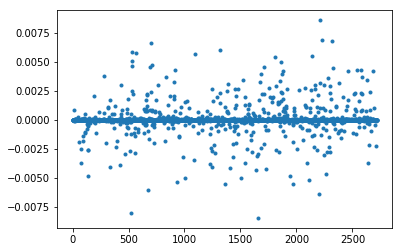

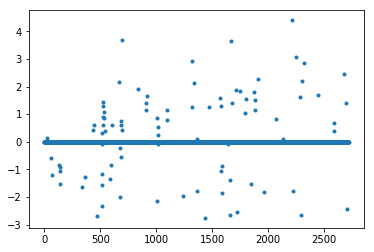

In [79]:
# decoding_powers['KL2']['FitModels'][0, 1]['Lasso'][0, 0]['Beta'][:, 0]
# plt.show()
# decoding_powers['KL2']['FitModels'][0, 1]['Ord']

plt.plot(decoding_powers['KL2']['FitModels'][0, 1]['Lasso'][0, 0]['Beta'][:, 0], '.')
plt.show()
plt.plot(pvalues['KL2']['Beta_lasso'], '.')
plt.show()

In [13]:
ERPs = {}
for learn_method in ["transition", "frequency"]:
    for TaskNumber in [1, 2][:1]:
        Sub = 1
        filename = f'{learn_method}_Task{TaskNumber:02}_Sub{Sub:03}.mat'
        filepath = os.path.join('Output', 'ERPs', filename)
        # print(filename)
        data = sio.loadmat(filepath)
        #decoding_powers[f'{Period}_{SurpriseMethod}_{TaskNumber}_{learn_method}'] = data
        ERPs[f'{learn_method}_{TaskNumber}_{Sub}'] = data

In [16]:
null_decoding_powers = {}
for SurpriseMethod in ["KL2", "log2", "PUZ", "PUZ2"]:
    for Period in ['all', 'mmn', 'p300', 'early', 'signal'][:1]:
        for learn_method in ["transition", "frequency"][:1]:
            for TaskNumber in [1, 2][:1]:
                Sub = 1
                filename = f'Dec_model_NullDist_{SurpriseMethod}_{Period}_{learn_method}_Task{TaskNumber:02}_Sub{Sub:03}.mat'
                filepath = os.path.join('Output', 'null_models', filename)
                
                data = sio.loadmat(filepath)
                null_decoding_powers[SurpriseMethod] = data

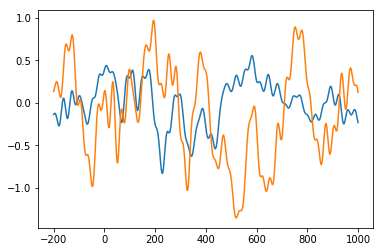

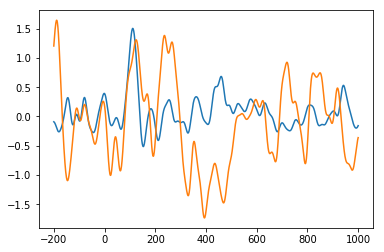

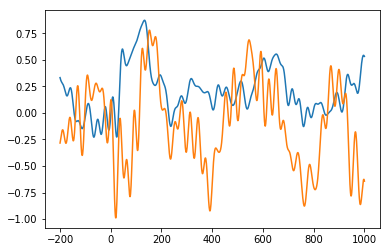

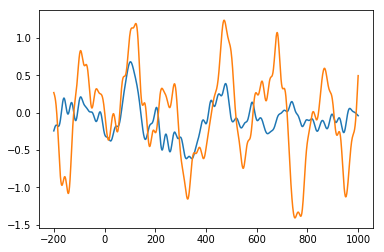

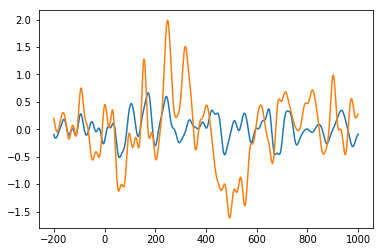

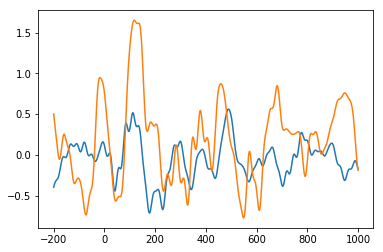

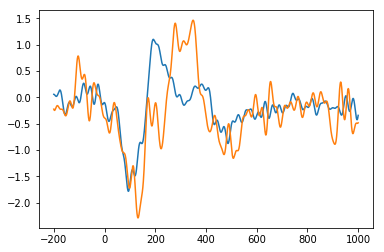

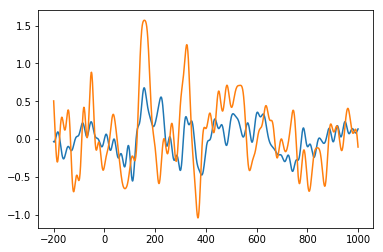

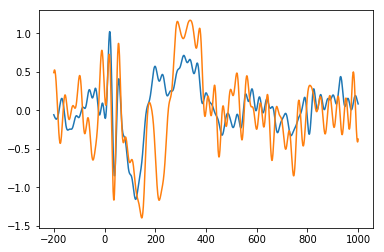

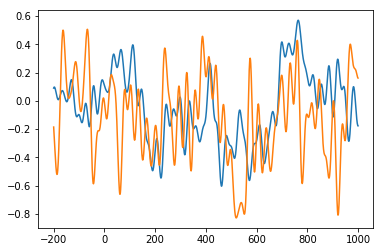

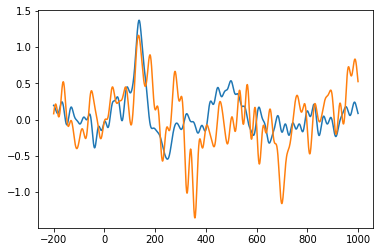

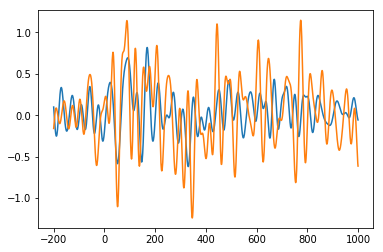

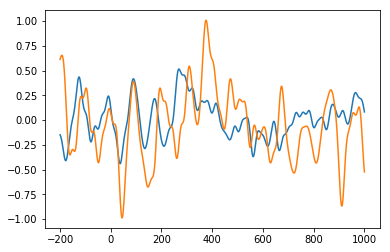

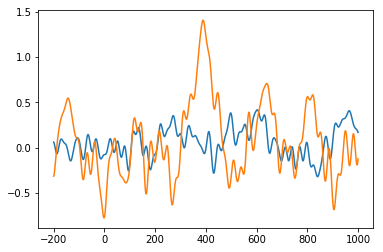

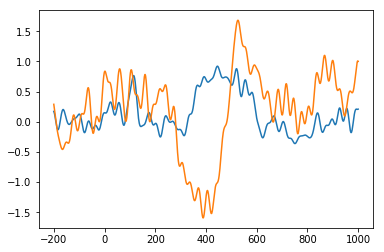

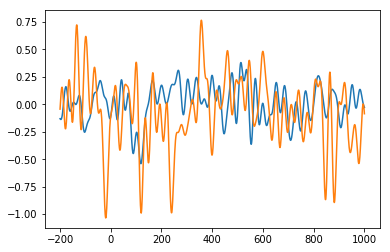

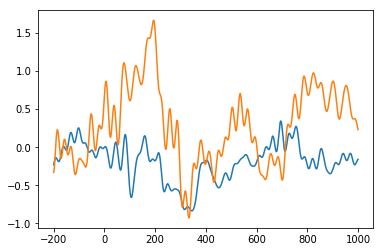

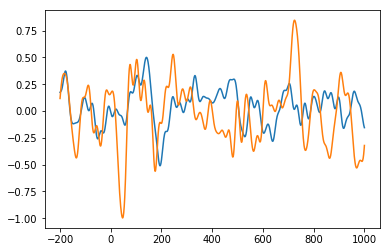

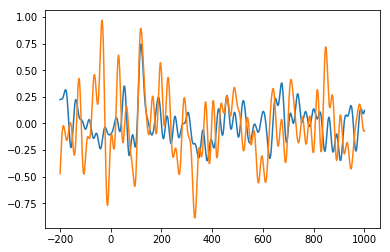

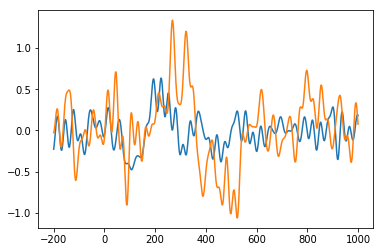

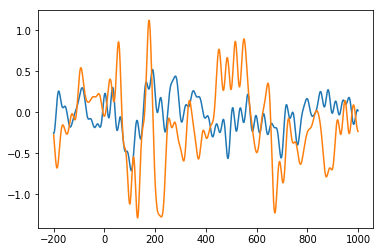

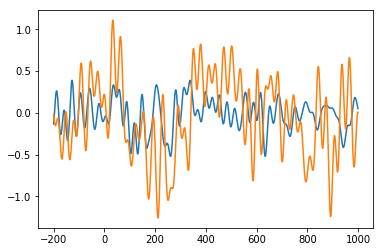

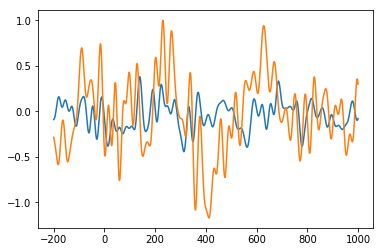

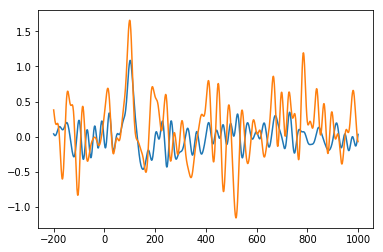

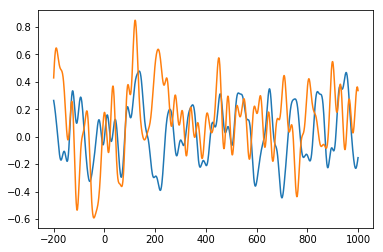

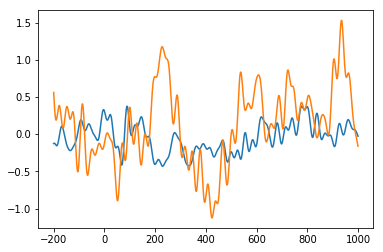

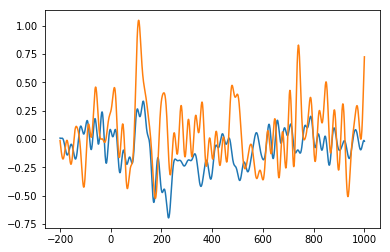

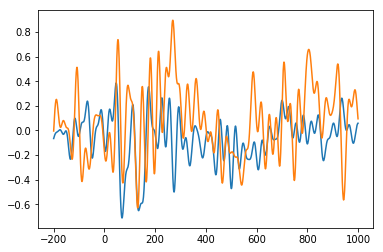

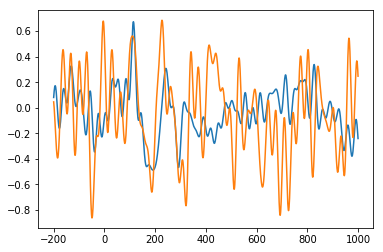

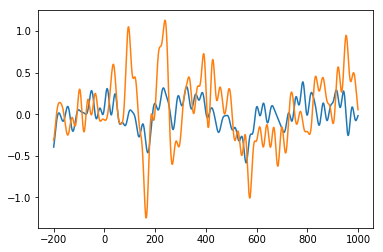

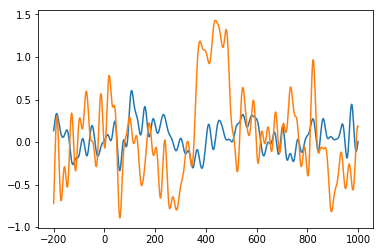

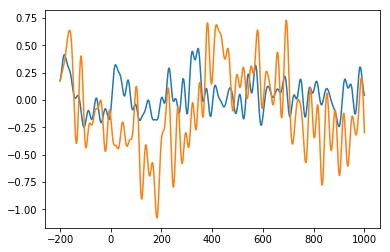

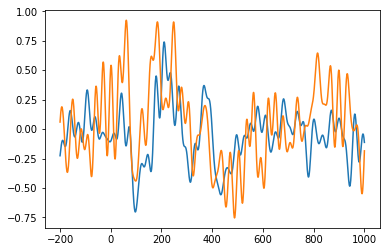

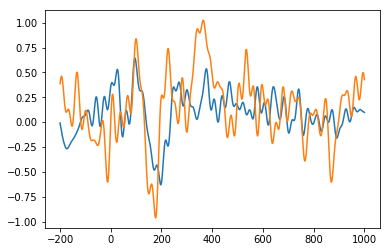

In [34]:
for i in range(34):
    plt.plot(range(-200, 1001), ERPs['transition_1_1']['Stn_ERP'][:, i])
    plt.plot(range(-200, 1001), ERPs['transition_1_1']['Dev_ERP'][:, i])
    plt.show()